In [1]:
!pip install nsepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for nsepy: filename=nsepy-0.8-py3-none-any.whl size=36084 sha256=06d3fcb29c21d7bc795ff98c3486e9e82f4e1d181a0fcffb71ba1b6aa30d57a7
  Stored in directory: /root/.cache/pip/wheels/32/ab/d9/78ceea14cdf6de83376082b3cb0c2999fd77f823e35c47b9ec
Successfully built nsepy


In [2]:
import sys
print(sys.version)

3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]


In [3]:
pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
# Importing dependencies
from nsepy import get_history as gh
import numpy as np
np.random.seed(1)
import tensorflow as tf
tf.random.set_seed(2)
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.layers.core import Dense
from keras.layers.recurrent import LSTM
from keras import optimizers
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import datetime as dt
import time
plt.style.use('ggplot')
import snscrape.modules.twitter as sntwitter
from textblob import TextBlob
from wordcloud import WordCloud
import re


In [5]:
start = dt.datetime(2016,1,1)
end = dt.datetime(2022,6,30)


In [6]:
#SOUTHBANK
# Creating list to append tweet data to
attributes_container = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('Private Banks AND India since:2016-01-01 until:2022-06-30').get_items()):
    if i>200000:
        break
    attributes_container.append([tweet.date, tweet.content])
    
# Creating a dataframe to load the list
tweets_df = pd.DataFrame(attributes_container, columns=["Date Created", "Tweet"])

In [7]:
tweets_df

,Date Created,Tweet
0,2022-06-29 05:34:14+00:00,#MintPlainFacts | Private Banks have a distinc...
1,2022-06-29 03:28:03+00:00,"Stocks in the news: SBI, ICICI Bank, Indian Ce..."
2,2022-06-29 03:05:47+00:00,Financial Inclusion: Private banks expanding a...
3,2022-06-29 03:03:09+00:00,"SBI, HDC Bank, ICICI Bank: State Bank of India..."
4,2022-06-28 12:17:26+00:00,Private banks lead the expansion of India’s ba...
...,...,...
12575,2016-01-01 15:49:11+00:00,@IndiaChardham Hotel Ganga Sadan India locate...
12576,2016-01-01 15:48:07+00:00,@chardham_yatra Hotel Ganga Sadan India locat...
12577,2016-01-01 15:46:28+00:00,@NagpurRotary Hotel Ganga Sadan India located...
12578,2016-01-01 15:44:17+00:00,@RotaryExeterUK Hotel Ganga Sadan India locate...


In [8]:
 #Create a function to get Subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Create a function to get polarity
def getpolarity(text):
  return TextBlob(text).sentiment.polarity

#Create two new columns
tweets_df['Subjectivity'] = tweets_df['Tweet'].apply(getSubjectivity)
tweets_df['Polarity'] = tweets_df['Tweet'].apply(getpolarity)

In [9]:
tweets_df1 = tweets_df

In [10]:
tweets_df1

,Date Created,Tweet,Subjectivity,Polarity
0,2022-06-29 05:34:14+00:00,#MintPlainFacts | Private Banks have a distinc...,0.337500,-0.050000
1,2022-06-29 03:28:03+00:00,"Stocks in the news: SBI, ICICI Bank, Indian Ce...",0.258929,-0.035714
2,2022-06-29 03:05:47+00:00,Financial Inclusion: Private banks expanding a...,0.205952,0.095238
3,2022-06-29 03:03:09+00:00,"SBI, HDC Bank, ICICI Bank: State Bank of India...",0.258929,-0.035714
4,2022-06-28 12:17:26+00:00,Private banks lead the expansion of India’s ba...,0.375000,0.000000
...,...,...,...,...
12575,2016-01-01 15:49:11+00:00,@IndiaChardham Hotel Ganga Sadan India locate...,0.687500,0.425000
12576,2016-01-01 15:48:07+00:00,@chardham_yatra Hotel Ganga Sadan India locat...,0.687500,0.425000
12577,2016-01-01 15:46:28+00:00,@NagpurRotary Hotel Ganga Sadan India located...,0.687500,0.425000
12578,2016-01-01 15:44:17+00:00,@RotaryExeterUK Hotel Ganga Sadan India locate...,0.687500,0.425000


In [11]:
#Clean the text
def cleantext(text):
  tweet = re.sub("@[A-Za-z0-9]+","",text) #Remove @ sign
  tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
  text = re.sub(r'http', ' ', text) #removing http
  text = re.sub(r'#', ' ', text) #removing the '#' symbol
  text = re.sub(r'RT[\s]+', ' ', text) #removing RT

  return text

#Cleaning the text
tweets_df1 = tweets_df1['Tweet'].apply(cleantext)
tweets_df1 = pd.DataFrame(tweets_df1)

In [12]:
tweets_df1

,Tweet
0,MintPlainFacts | Private Banks have a distinc...
1,"Stocks in the news: SBI, ICICI Bank, Indian Ce..."
2,Financial Inclusion: Private banks expanding a...
3,"SBI, HDC Bank, ICICI Bank: State Bank of India..."
4,Private banks lead the expansion of India’s ba...
...,...
12575,@IndiaChardham Hotel Ganga Sadan India locate...
12576,@chardham_yatra Hotel Ganga Sadan India locat...
12577,@NagpurRotary Hotel Ganga Sadan India located...
12578,@RotaryExeterUK Hotel Ganga Sadan India locate...


In [13]:
#adding date
tweets_df1['Date Created'] = tweets_df['Date Created']

#swapping the columns
tweets_df1['temp'] = tweets_df1['Date Created']
tweets_df1['Date Created'] = tweets_df1['Tweet']
tweets_df1['Tweet'] = tweets_df1['temp']
tweets_df1.drop(columns=['temp'], inplace=True)
tweets_df1.rename(columns = {'Date Created':'temp1'}, inplace = True)
tweets_df1.rename(columns = {'Tweet':'Date Created'}, inplace = True)
tweets_df1.rename(columns = {'temp1':'Tweet'}, inplace = True)

tweets_df1

,Date Created,Tweet
0,2022-06-29 05:34:14+00:00,MintPlainFacts | Private Banks have a distinc...
1,2022-06-29 03:28:03+00:00,"Stocks in the news: SBI, ICICI Bank, Indian Ce..."
2,2022-06-29 03:05:47+00:00,Financial Inclusion: Private banks expanding a...
3,2022-06-29 03:03:09+00:00,"SBI, HDC Bank, ICICI Bank: State Bank of India..."
4,2022-06-28 12:17:26+00:00,Private banks lead the expansion of India’s ba...
...,...,...
12575,2016-01-01 15:49:11+00:00,@IndiaChardham Hotel Ganga Sadan India locate...
12576,2016-01-01 15:48:07+00:00,@chardham_yatra Hotel Ganga Sadan India locat...
12577,2016-01-01 15:46:28+00:00,@NagpurRotary Hotel Ganga Sadan India located...
12578,2016-01-01 15:44:17+00:00,@RotaryExeterUK Hotel Ganga Sadan India locate...


In [14]:
#Create a function to get Subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Create a function to get polarity
def getpolarity(text):
  return TextBlob(text).sentiment.polarity

#Create two new columns
tweets_df1['Subjectivity'] = tweets_df1['Tweet'].apply(getSubjectivity)
tweets_df1['Polarity'] = tweets_df1['Tweet'].apply(getpolarity)

In [15]:
tweets_df1

,Date Created,Tweet,Subjectivity,Polarity
0,2022-06-29 05:34:14+00:00,MintPlainFacts | Private Banks have a distinc...,0.337500,-0.050000
1,2022-06-29 03:28:03+00:00,"Stocks in the news: SBI, ICICI Bank, Indian Ce...",0.258929,-0.035714
2,2022-06-29 03:05:47+00:00,Financial Inclusion: Private banks expanding a...,0.205952,0.095238
3,2022-06-29 03:03:09+00:00,"SBI, HDC Bank, ICICI Bank: State Bank of India...",0.258929,-0.035714
4,2022-06-28 12:17:26+00:00,Private banks lead the expansion of India’s ba...,0.375000,0.000000
...,...,...,...,...
12575,2016-01-01 15:49:11+00:00,@IndiaChardham Hotel Ganga Sadan India locate...,0.687500,0.425000
12576,2016-01-01 15:48:07+00:00,@chardham_yatra Hotel Ganga Sadan India locat...,0.687500,0.425000
12577,2016-01-01 15:46:28+00:00,@NagpurRotary Hotel Ganga Sadan India located...,0.687500,0.425000
12578,2016-01-01 15:44:17+00:00,@RotaryExeterUK Hotel Ganga Sadan India locate...,0.687500,0.425000


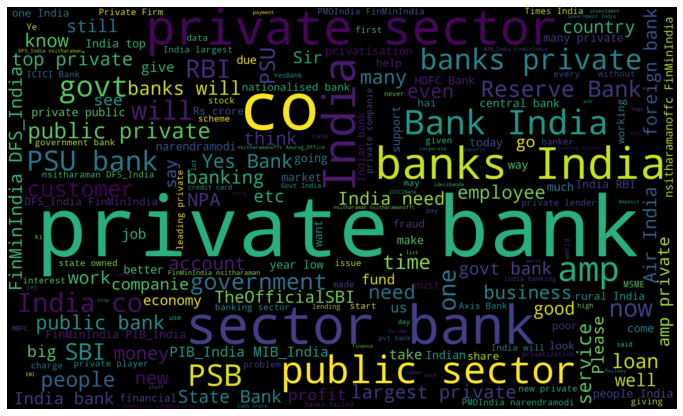

In [16]:
#Plot the Word Cloud
allwords = ' '.join([twts for twts in tweets_df1['Tweet']])
wordcloud = WordCloud(width =2000, height =1200, random_state =21, max_font_size =250).generate(allwords)

plt.figure(figsize=(12,20))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [17]:
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'

tweets_df1['Analysis']= tweets_df1['Polarity'].apply(getAnalysis)

In [18]:
tweets_df1

,Date Created,Tweet,Subjectivity,Polarity,Analysis
0,2022-06-29 05:34:14+00:00,MintPlainFacts | Private Banks have a distinc...,0.337500,-0.050000,Negative
1,2022-06-29 03:28:03+00:00,"Stocks in the news: SBI, ICICI Bank, Indian Ce...",0.258929,-0.035714,Negative
2,2022-06-29 03:05:47+00:00,Financial Inclusion: Private banks expanding a...,0.205952,0.095238,Positive
3,2022-06-29 03:03:09+00:00,"SBI, HDC Bank, ICICI Bank: State Bank of India...",0.258929,-0.035714,Negative
4,2022-06-28 12:17:26+00:00,Private banks lead the expansion of India’s ba...,0.375000,0.000000,Neutral
...,...,...,...,...,...
12575,2016-01-01 15:49:11+00:00,@IndiaChardham Hotel Ganga Sadan India locate...,0.687500,0.425000,Positive
12576,2016-01-01 15:48:07+00:00,@chardham_yatra Hotel Ganga Sadan India locat...,0.687500,0.425000,Positive
12577,2016-01-01 15:46:28+00:00,@NagpurRotary Hotel Ganga Sadan India located...,0.687500,0.425000,Positive
12578,2016-01-01 15:44:17+00:00,@RotaryExeterUK Hotel Ganga Sadan India locate...,0.687500,0.425000,Positive


In [19]:
tweets_df1['Analysis'].value_counts()

Positive    5723
Neutral     3768
Negative    3089
Name: Analysis, dtype: int64

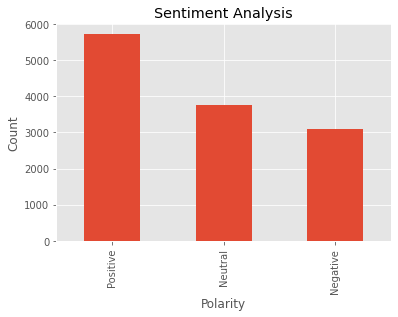

In [20]:
tweets_df1['Analysis'].value_counts().plot(kind='bar')
plt.title("Sentiment Analysis")
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.show()

In [22]:
tweets_df1['Sentiment Parameter'] = tweets_df1['Subjectivity'] * tweets_df1['Polarity']

tweets_df1.head()

,Date Created,Tweet,Subjectivity,Polarity,Analysis,Sentiment Parameter
0,2022-06-29 05:34:14+00:00,MintPlainFacts | Private Banks have a distinc...,0.337500,-0.050000,Negative,-0.016875
1,2022-06-29 03:28:03+00:00,"Stocks in the news: SBI, ICICI Bank, Indian Ce...",0.258929,-0.035714,Negative,-0.009247
2,2022-06-29 03:05:47+00:00,Financial Inclusion: Private banks expanding a...,0.205952,0.095238,Positive,0.019615
3,2022-06-29 03:03:09+00:00,"SBI, HDC Bank, ICICI Bank: State Bank of India...",0.258929,-0.035714,Negative,-0.009247
4,2022-06-28 12:17:26+00:00,Private banks lead the expansion of India’s ba...,0.375000,0.000000,Neutral,0.000000


In [23]:
tweets_df1['Date Created'] = pd.to_datetime(tweets_df1['Date Created'])
tweets_df1.set_index('Date Created', inplace=True)
tweets_df2=tweets_df1.groupby(tweets_df1.index.date)['Sentiment Parameter'].mean()

In [24]:
tweets_df2=pd.DataFrame(tweets_df2)
tweets_df2.index.name = 'Date'
tweets_df2

,Sentiment Parameter
Date,
2016-01-01,0.279484
2016-01-05,0.054688
2016-01-06,0.053825
2016-01-08,0.002531
2016-01-12,0.034722
...,...
2022-06-25,-0.029167
2022-06-26,0.014552
2022-06-27,0.021979


In [25]:
df = gh(symbol='SOUTHBANK',start=start,end=end)
df.tail()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2022-06-24,SOUTHBANK,EQ,7.45,7.50,7.55,7.45,7.50,7.45,7.48,1609758,1.204145e+12,5195,1049240,0.6518
2022-06-27,SOUTHBANK,EQ,7.45,7.55,7.75,7.50,7.65,7.60,7.65,4298727,3.287803e+12,5486,1733969,0.4034
2022-06-28,SOUTHBANK,EQ,7.60,7.65,7.65,7.55,7.65,7.60,7.60,942897,7.169120e+11,4345,564766,0.5990
2022-06-29,SOUTHBANK,EQ,7.60,7.60,7.75,7.55,7.70,7.65,7.65,2800128,2.143387e+12,5070,1074083,0.3836
2022-06-30,SOUTHBANK,EQ,7.65,7.70,7.75,7.55,7.60,7.60,7.66,1317340,1.008601e+12,7965,655753,0.4978


In [26]:
#Variables for training
df1 = (df)[['Open','High','Low','Close','Prev Close','VWAP','Turnover','Last','Volume']]
print(df1)
df1.shape

             Open   High    Low  Close  Prev Close   VWAP      Turnover  \
Date                                                                      
2016-01-01  19.30  19.70  19.30  19.65       19.35  19.55  3.449777e+12   
2016-01-04  19.65  20.10  19.45  19.55       19.65  19.72  6.016627e+12   
2016-01-05  19.60  20.05  19.50  19.95       19.55  19.76  5.650642e+12   
2016-01-06  20.10  20.35  19.50  20.05       19.95  20.02  9.327879e+12   
2016-01-07  19.65  19.90  19.45  19.55       20.05  19.59  1.120506e+13   
...           ...    ...    ...    ...         ...    ...           ...   
2022-06-24   7.50   7.55   7.45   7.45        7.45   7.48  1.204145e+12   
2022-06-27   7.55   7.75   7.50   7.60        7.45   7.65  3.287803e+12   
2022-06-28   7.65   7.65   7.55   7.60        7.60   7.60  7.169120e+11   
2022-06-29   7.60   7.75   7.55   7.65        7.60   7.65  2.143387e+12   
2022-06-30   7.70   7.75   7.55   7.60        7.65   7.66  1.008601e+12   

             Last   Volu

(1609, 9)

In [27]:
df2 = pd.merge(tweets_df2, df1, how = 'outer', on = 'Date')

In [28]:
df2 = df2.dropna()
df2

,Sentiment Parameter,Open,High,Low,Close,Prev Close,VWAP,Turnover,Last,Volume
Date,,,,,,,,,,
2016-01-01,0.279484,19.30,19.70,19.30,19.65,19.35,19.55,3.449777e+12,19.70,1764925.0
2016-01-05,0.054688,19.60,20.05,19.50,19.95,19.55,19.76,5.650642e+12,19.90,2860295.0
2016-01-06,0.053825,20.10,20.35,19.50,20.05,19.95,20.02,9.327879e+12,20.05,4658414.0
2016-01-08,0.002531,19.65,19.85,19.50,19.55,19.55,19.62,3.605461e+12,19.60,1837744.0
2016-01-12,0.034722,19.55,19.65,19.15,19.20,19.50,19.37,6.727745e+12,19.25,3472655.0
...,...,...,...,...,...,...,...,...,...,...
2022-06-23,-0.007574,7.45,7.60,7.40,7.45,7.40,7.49,1.924799e+12,7.45,2570365.0
2022-06-24,0.023916,7.50,7.55,7.45,7.45,7.45,7.48,1.204145e+12,7.50,1609758.0
2022-06-27,0.021979,7.55,7.75,7.50,7.60,7.45,7.65,3.287803e+12,7.65,4298727.0


In [29]:
df2['Lift'] = df2['Close'] - df2['Open']
df2

,Sentiment Parameter,Open,High,Low,Close,Prev Close,VWAP,Turnover,Last,Volume,Lift
Date,,,,,,,,,,,
2016-01-01,0.279484,19.30,19.70,19.30,19.65,19.35,19.55,3.449777e+12,19.70,1764925.0,0.35
2016-01-05,0.054688,19.60,20.05,19.50,19.95,19.55,19.76,5.650642e+12,19.90,2860295.0,0.35
2016-01-06,0.053825,20.10,20.35,19.50,20.05,19.95,20.02,9.327879e+12,20.05,4658414.0,-0.05
2016-01-08,0.002531,19.65,19.85,19.50,19.55,19.55,19.62,3.605461e+12,19.60,1837744.0,-0.10
2016-01-12,0.034722,19.55,19.65,19.15,19.20,19.50,19.37,6.727745e+12,19.25,3472655.0,-0.35
...,...,...,...,...,...,...,...,...,...,...,...
2022-06-23,-0.007574,7.45,7.60,7.40,7.45,7.40,7.49,1.924799e+12,7.45,2570365.0,0.00
2022-06-24,0.023916,7.50,7.55,7.45,7.45,7.45,7.48,1.204145e+12,7.50,1609758.0,-0.05
2022-06-27,0.021979,7.55,7.75,7.50,7.60,7.45,7.65,3.287803e+12,7.65,4298727.0,0.05


In [30]:
print(df2.describe().Turnover)
df2.drop(df2[df2['Turnover'] == 0].index, inplace = True)

count    1.435000e+03
mean     2.002258e+13
std      2.744272e+13
min      7.169120e+11
25%      5.580469e+12
50%      1.154466e+13
75%      2.315659e+13
max      3.126461e+14
Name: Turnover, dtype: float64


In [31]:
# Setting up an early stop
earlystop = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=80,  verbose=1, mode='min')
callbacks_list = [earlystop]

In [32]:
#Build and train the model
def fit_model(train,val,timesteps,hl,lr,batch,epochs):
    X_train = []
    Y_train = []
    X_val = []
    Y_val = []
  
    # Loop for training data
    for i in range(timesteps,train.shape[0]):
        X_train.append(train[i-timesteps:i])
        Y_train.append(train[i][0])
    X_train,Y_train = np.array(X_train),np.array(Y_train)
  
    # Loop for val data
    for i in range(timesteps,val.shape[0]):
        X_val.append(val[i-timesteps:i])
        Y_val.append(val[i][0])
    X_val,Y_val = np.array(X_val),np.array(Y_val)
    
    # Adding Layers to the model
    model = Sequential()
    model.add(LSTM(X_train.shape[2],input_shape = (X_train.shape[1],X_train.shape[2]),return_sequences = True,
                   activation = 'relu'))
    for i in range(len(hl)-1):        
        model.add(LSTM(hl[i],activation = 'relu',return_sequences = True))
    model.add(LSTM(hl[-1],activation = 'relu'))
    model.add(Dense(1))
    model.compile(optimizer = tf.keras.optimizers.Adam(lr = lr), loss = 'mean_squared_error')
    #print(model.summary())
  
    # Training the data
    history = model.fit(X_train,Y_train,epochs = epochs,batch_size = batch,validation_data = (X_val, Y_val),verbose = 0,
                        shuffle = False, callbacks=callbacks_list)
    model.reset_states()
    return model, history.history['loss'], history.history['val_loss']

In [33]:
# Evaluating the model
def evaluate_model(model,test,timesteps):
    X_test = []
    Y_test = []

    # Loop for testing data
    for i in range(timesteps,test.shape[0]):
        X_test.append(test[i-timesteps:i])
        Y_test.append(test[i][0])
    X_test,Y_test = np.array(X_test),np.array(Y_test)
    #print(X_test.shape,Y_test.shape)
  
    # Prediction Time 
    Y_hat = model.predict(X_test)
    mae = mean_absolute_error(Y_test,Y_hat)
    r = r2_score(Y_test,Y_hat)
    return mae, r, Y_test, Y_hat

In [35]:
# Plotting the predictions
def plot_data(Y_test,Y_hat):
    plt.plot(Y_test,c = 'r')
    plt.plot(Y_hat,c = 'y')
    plt.xlabel('Day')
    plt.ylabel('Stock Trend')
    plt.title('Stock Prediction Graph using Multivariate-LSTM model')
    plt.legend(['Actual','Predicted'],loc = 'lower right')
    plt.show()

In [36]:
# Plotting the training errors
def plot_error(train_loss,val_loss):
    plt.plot(train_loss,c = 'r')
    plt.plot(val_loss,c = 'b')
    plt.ylabel('Loss')
    plt.legend(['train','val'],loc = 'upper right')
    plt.show()

In [37]:
# Extracting the series

series = df2[['Close','Turnover','Lift','Sentiment Parameter']]

print(series.shape)
print(series.tail())

(1435, 4)
            Close      Turnover  Lift  Sentiment Parameter
Date                                                      
2022-06-23   7.45  1.924799e+12  0.00            -0.007574
2022-06-24   7.45  1.204145e+12 -0.05             0.023916
2022-06-27   7.60  3.287803e+12  0.05             0.021979
2022-06-28   7.60  7.169120e+11 -0.05            -0.001273
2022-06-29   7.65  2.143387e+12  0.05            -0.003939


In [38]:
# Train Val Test Split

train_start = dt.date(2016,1,1)
train_end = dt.date(2019,12,31)
train_data = series.loc[train_start:train_end]


val_start = dt.date(2020,1,1)
val_end = dt.date(2020,12,31)
val_data = series.loc[val_start:val_end]


test_start = dt.date(2021,1,1)
test_end = dt.date(2022,6,30)
test_data = series.loc[test_start:test_end]

print(train_data.shape,val_data.shape,test_data.shape)

(821, 4) (247, 4) (367, 4)


In [39]:
# Normalisation
sc = MinMaxScaler()
train = sc.fit_transform(train_data)
val = sc.transform(val_data)
test = sc.transform(test_data)
print(train.shape,val.shape,test.shape)

(821, 4) (247, 4) (367, 4)


In [40]:
timesteps = 30
hl = [40,35] #Neurons in each layer
lr = 1e-3 #Learning rate 0.001
batch_size = 30
num_epochs = 150

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


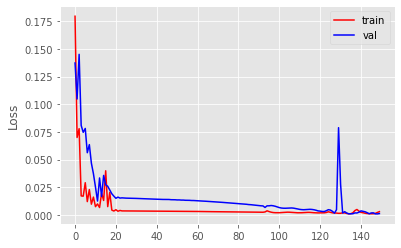

In [41]:
model,train_error,val_error = fit_model(train,val,timesteps,hl,lr,batch_size,num_epochs)
plot_error(train_error,val_error)

MAE = 0.012767612019423297
R-Squared Score = 0.9067941593981202


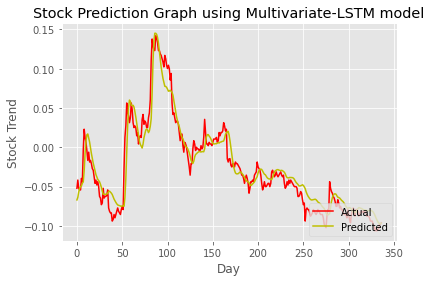

In [44]:
mae, r2_value,true,predicted = evaluate_model(model,test,timesteps)

print('MAE = {}'.format(mae))
print('R-Squared Score = {}'.format(r2_value))
plot_data(true,predicted)
